In [1]:
import numpy as np 
import numpy.random as npr
import networkx as nx
import matplotlib as plt
import plotly.graph_objects as go
import sys 
import graphviz

In [2]:
# variables

alpha = 0.8
beta = 0.2
u1 = 15
u2 = 75
thinkTime = 5000
timeSlice = 3
Sio1 = 40
Sio2 = 180
qio1 = 0.65 #route to io1
qio2 = 0.25 # route to io2
qoutd = 0.1*0.4 #go to delay station
qouts = 0.1*0.6 # renter the system

In [18]:


class DiGraph():
   
   def __init__(self):
     self.graph = nx.digraph.DiGraph()
     self.viz = graphviz.Digraph()
     self.lastHead = ""
     self.lastTail = ""
     pass

   def gen(self,headLabel, tailLabel, p):
    self.lastHead = headLabel
    self.lastTail = tailLabel 
    self.graph.add_edge(headLabel,tailLabel,weight=round(p,5))
    return (headLabel,tailLabel)

   def Graph(self):
     return self.graph
   
   
   def __and__(self,arg:tuple[str,str,float]):
     return self.gen(arg[0],arg[1],arg[2])
  
   
   def __getitem__(self,index):
     return self.graph.edges()[index]
   
   def __call__(self, head,tail,p):
       self.gen(head() if callable(head) else head, tail() if callable(tail) else tail, p)
       return self
   
   def add_edges(self,edges: list[tuple]):
     for edge in edges:
       head = ""
       tail = ""
       if callable(edge[0]): head = edge[0]()
       else: head=edge[0]
       if callable(edge[1]): tail = edge[1]()
       else: tail = edge[1]
       self.gen(head,tail,edge[2])
       pass
     pass
   
   def add_node(self,node:str):
     self.graph.add_node(node)
     pass
   
   
   def last_tail(self): return self.lastTail
   def last_head(self) : return self.lastHead

   def gviz(self):
      graph = graphviz.Digraph()
      for node in self.graph.nodes:
        graph.node(node)
        pass
      for edge in self.graph.edges:
       graph.edge(edge[0],edge[1],str(self.graph.get_edge_data(edge[0],edge[1])["weight"]))
       pass
      return graph

   pass

   



In [3]:
def stage_enumerator(stage: int) -> list[str]:
    Ndelay = 0
    Ncpu = 1
    Nio1 = 2
    Nio2 = 3
    cpuStage = stage
    stages = [0,0,0,0]
    result = []
    while stages[Ndelay] <= 3:
        for i in reversed(range(4)):
            stages[i] += 1
            if stages[i] <= 3: break
            elif i > 0 : stages[i] = 0
            pass
        if sum(stages) ==3:
            (result.append("{},{},{},{}".format(
                stages[Ndelay],
                stages[Ncpu] if stages[Ncpu] == 0 else "{}.{}".format(stages[Ncpu],cpuStage),
                stages[Nio1],
                stages[Nio2],
            )))
            print(result[-1])
            pass
        pass
    return result


print(stage_enumerator(1))
print(stage_enumerator(2))

0,0,0,3
0,0,1,2
0,0,2,1
0,0,3,0
0,1.1,0,2
0,1.1,1,1
0,1.1,2,0


KeyboardInterrupt: 

legend (Delay_station,CPU.Stage,IO1,IO2)


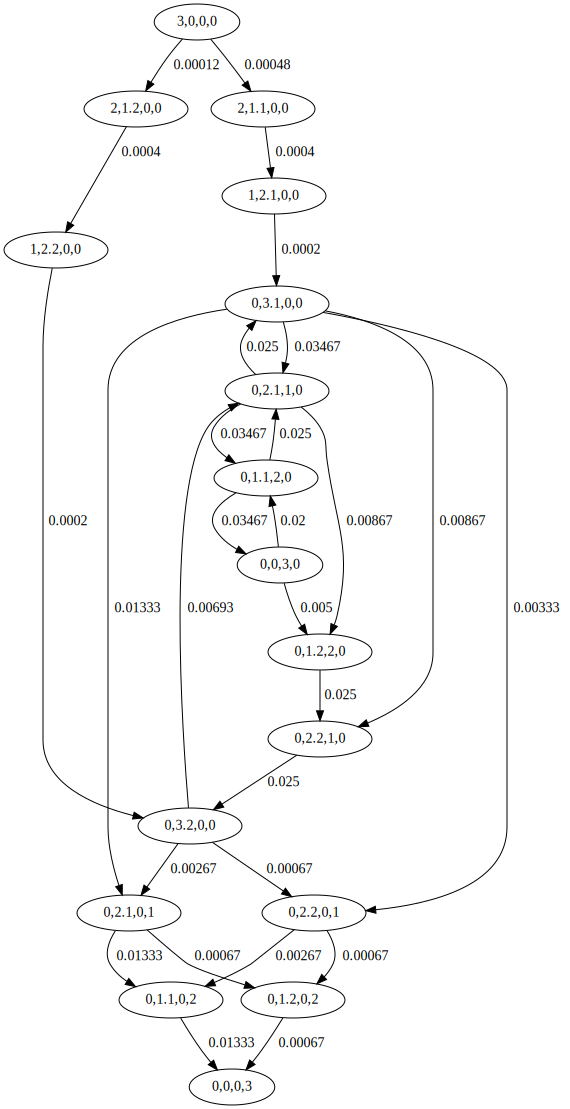

In [24]:
chain = DiGraph()
(chain
("3,0,0,0","2,1.1,0,0",(1/thinkTime)*alpha*3)
(chain.last_tail,"1,2.1,0,0",(1/thinkTime)*2)
(chain.last_tail,"0,3.1,0,0",(1/thinkTime))
("3,0,0,0","2,1.2,0,0",(1/thinkTime)*beta*3)
(chain.last_tail,"1,2.2,0,0",(1/thinkTime)*2)
(chain.last_tail,"0,3.2,0,0",(1/thinkTime))
#departure to IO1 from stage 1
("0,3.1,0,0","0,2.1,1,0", (1/u1)*alpha*qio1) 
(chain.last_tail, "0,1.1,2,0", (1/u1)*alpha*qio1)
(chain.last_tail, "0,0,3,0",(1/u1)*alpha*qio1)
#return to stage 1 from io1
(chain.last_tail, "0,1.1,2,0", (1/Sio1)*alpha)
(chain.last_tail,"0,2.1,1,0",(1/Sio1))
(chain.last_tail,"0,3.1,0,0",(1/Sio1))
#return to stage2 from io1
("0,0,3,0","0,1.2,2,0",(1/Sio1)*beta)
(chain.last_tail,"0,2.2,1,0",(1/Sio1))
(chain.last_tail, "0,3.2,0,0",(1/Sio1))
#change of stage and to io1
("0,3.2,0,0","0,2.1,1,0",(1/u2)*alpha*qio1)
(chain.last_tail,"0,1.2,2,0",(1/u1)*beta*qio1)
("0,3.1,0,0","0,2.2,1,0", (1/u1)*beta*qio1)
#return to stage 1 to io2
("0,3.1,0,0","0,2.1,0,1",(1/u1)*alpha*qio2)
(chain.last_tail,"0,1.1,0,2",(1/u1)*alpha*qio2)
(chain.last_tail,"0,0,0,3",(1/u1)*alpha*qio2)
#return to stage 2 to io2
("0,3.2,0,0","0,2.2,0,1",(1/u2)*beta*qio2)
(chain.last_tail,"0,1.2,0,2",(1/u2)*beta*qio2)
(chain.last_tail,"0,0,0,3",(1/u2)*beta*qio2)
#swapping stage 2 to 1 to io2
("0,3.2,0,0","0,2.1,0,1",(1/u2)*alpha*qio2)
(chain.last_tail,"0,1.2,0,2",(1/u2)*beta*qio2)
("0,3.1,0,0","0,2.2,0,1",(1/u1)*beta*qio2)
(chain.last_tail,"0,1.1,0,2",(1/u2)*alpha*qio2)
)
chain.gviz()